In [1]:
from data_set_loader import get_data_set_loader
from torchvision import transforms

transform_test = transforms.Compose([transforms.Resize((224, 224)), \
                                     transforms.ToTensor(), \
                                     transforms.Normalize((0.485, 0.456, 0.406), \
                                                          (0.229, 0.224, 0.225))])

data_set_loader = get_data_set_loader(transform=transform_test,    
                         mode='test')

Vocabulary completely loaded..


In [2]:
import os
import torch
from pipeline_models import EncoderCNN, DecoderRNN
import torch

encoder_file = 'encoder_colab_epoch3.pkl' 
decoder_file = 'decoder_colab_epoch3.pkl'

embedding_size = 512
hidden_units = 512
batch_size=512

vocab_size = len(data_set_loader.dataset.vocabulary)

encoder = EncoderCNN(embedding_size)
encoder.eval()
decoder = DecoderRNN(embedding_size, hidden_units, vocab_size,batch_size)
decoder.eval()

encoder.load_state_dict(torch.load(os.path.join('/Users/vamshi/Desktop/trained_models', encoder_file),map_location=torch.device('cpu')))
decoder.load_state_dict(torch.load(os.path.join('/Users/vamshi/Desktop/trained_models', decoder_file),map_location=torch.device('cpu')))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder.to(device)
decoder.to(device)

DecoderRNN(
  (word_embeddings): Embedding(9956, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=9956, bias=True)
)

In [3]:
def clean_sentence(output):
    list_string = []
    for idx in output:
        list_string.append(data_set_loader.dataset.vocabulary.idx2word[idx])
    list_string = list_string[1:-1]
    sentence = ' '.join(list_string)
    sentence = sentence.capitalize()
    return sentence

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def get_prediction():
    orig_image, image = next(iter(data_set_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

In [22]:
#Get caption of an image by passing the path to the image. The image can be any picture available in the internet. 
from PIL import Image
def get_image_caption(image_path):
    PIL_image = Image.open(image_path).convert('RGB')
    orig_image = np.array(PIL_image)

    transform_test = transforms.Compose([transforms.Resize((224, 224)), \
                                        transforms.ToTensor(), \
                                        transforms.Normalize((0.485, 0.456, 0.406), \
                                                            (0.229, 0.224, 0.225))])

    image = transform_test(PIL_image)
    plt.imshow(np.squeeze(orig_image))
    plt.title('Image')
    plt.show()
    image = image.to(device)
    image=torch.Tensor(image).unsqueeze(0)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

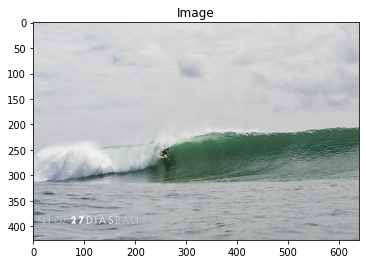

A person on a surfboard riding a wave .


In [26]:
get_image_caption('surf_image.jpg')

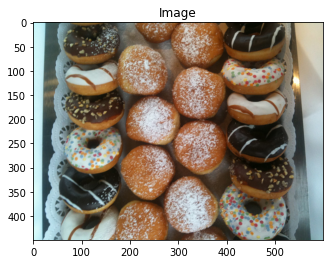

A box of donuts with a variety of donuts .


In [12]:
get_prediction()

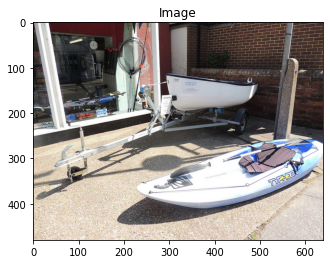

A small boat is sitting on the dock .


In [13]:
get_prediction()

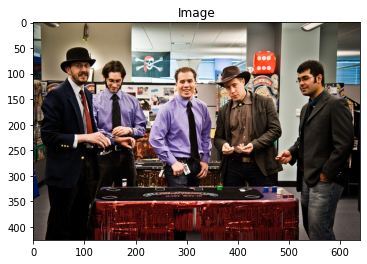

A group of people standing around a table .


In [16]:
get_prediction()

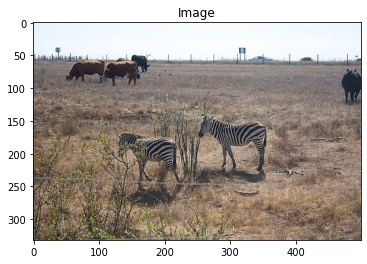

A herd of zebras grazing on a grassy plain .


In [20]:
get_prediction()